<a href="https://colab.research.google.com/github/Regis0323/Module_1/blob/main/Rurangwa_Assignment_Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #004B87; padding: 20px; text-align: center; border-radius: 10px; color: white; font-family: Arial, sans-serif; margin: auto; width: 80%;">
    <h1>IABE Data Science Certificate Module 1 Assignment</h1>
    <h2>RURANGWA IRADUKUNDA Jean-François Régis</h2>
    <h3>31st January, 2025</h3>
    <p>Email : jeanfrancoisregis.rurangwairadukunda@axa.be</p>
</div>


## Table of contents
1. [Introduction](#Introduction)<br />
2. [Data Exploration and Preprocessing](#Data_treatment)<br />
3. [Linear Models and Conditional Expectation Estimation](#Linear_Models)<br />
4. [Model testing and comparison](#Testing)<br />
  4.1. [Generalized Linear Models (GLM)](#GLM)<br />
  4.2. [Ridge Regression](#Ridge)<br />
  4.3. [Lasso Regression](#Lasso)<br />
  4.4. [ElasticNet Regression](#ElasticNet)<br />
  4.5. [Support Vector Machines](#SVM)<br />
  4.6. [Model Comparison and Visaulizations](#Model_Comparison)<br />
5. [Clustering Methods](#Clustering)<br />
6. [Conclusion](#Conclusion)<br />

# 1. Introduction<a name="Introduction"></a>


Under the 'Actuarial Data Scientist' program given by the Belgian association of actuaries (IABE), an assignment was given to us after the first (out of three) module to help us review all the concepts via a practical case.
<br/>
The assignment consists in analysing the "**Auto Insurance Claims Data**" dataset (retrieved on Kaggle) using the concepts learned in the module. This dataset contains different features related to auto insurance claims and tells if a claim was fraudulent or not.
<br/>
We shall now start the process which will lead us to determining the best predictive model that predicts if an insurance claim is fraudulent or not, starting by the data importation and processing, followed by the implementation of different models and ending up with a comparison of the different models before choosing the best one.

#2. Data Exploration and Preprocessing<a name="Data_treatment"></a>

We start by importing different packages that will be of use throughout the analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
import plotly.graph_objs as go
import plotly
import time
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
!git clone https://github.com/Regis0323/Import_files.git
!pip install scikit-fuzzy

# Packages used for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.metrics import r2_score

# KMeans
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

# Fuzzy clustering
import skfuzzy as fuzz

# Spectral Clustering
from sklearn.cluster import SpectralClustering

Cloning into 'Import_files'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), 387.23 KiB | 5.09 MiB/s, done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00


Then we can proceed importing the dataset and having a small look of the data alongside the different types of the variables.

In [2]:
claims_data = pd.read_csv("/content/Import_files/insurance_claims.csv")
display(claims_data.head())
print(claims_data.dtypes.value_counts())

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


object     21
int64      17
float64     2
Name: count, dtype: int64


Our dataset is composed of 40 columns, of which 21 are categorized as 'object', 17 as 64-bit 'integer' (int64) and 2 as 64-bit 'floating-point' numbers.
<br>
After a quick look of the 5 first rows, we can already see that some lines contain missing values ('?' and 'NaN'). We shall now do a thorough test to identify those missing values and treat them accordingly

In [3]:
claims_data.info()
claims_data['authorities_contacted'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,196


After this first check, we can see that the last column '_c39' is empty and can be deleted. Furthermore, it is shown that the variable 'authorities_contracted' has 91 missing values, but, after a closer look into the variable, those 91 values refer to the cases where **NO** authorities were called/contacted. This misunderstanding came from the fact that there were referred to as 'None' so we shall replace that and put 'Zero' instead.

In [4]:
claims_data.fillna(value='Zero', inplace=True)
claims_data['authorities_contacted'].value_counts()

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,196
Zero,91


As for the variables with '?' in their values, we shall identify them and replace them with the mode or the mean of the specified variable so that we won't encounter any 'missing values' problem, found when using some packages, while doing our study.

In [5]:
lookup_value = '?'
output = claims_data.isin([lookup_value])
values=claims_data.loc[:,output.any(axis=0)]
print(values)

      collision_type property_damage police_report_available
0     Side Collision             YES                     YES
1                  ?               ?                       ?
2     Rear Collision              NO                      NO
3    Front Collision               ?                      NO
4                  ?              NO                      NO
..               ...             ...                     ...
995  Front Collision             YES                       ?
996   Rear Collision             YES                       ?
997   Side Collision               ?                     YES
998   Rear Collision               ?                     YES
999                ?               ?                       ?

[1000 rows x 3 columns]


Three variables are identified in this case: 'collision_type','property_damage'and 'police_report_available.

In [6]:
#Before the replacement
print(claims_data['collision_type'].value_counts())
print(claims_data['property_damage'].value_counts())
print(claims_data['police_report_available'].value_counts())

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64
property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64
police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64


It is best to replace the values found in the 'collision_type' variable with its mode (='Rear Collision') and the value 'NO' for the two remaining variables as its their second most frequent value after '?' which is the mode for both of them.

In [7]:
#After the replacement
claims_data['collision_type'].replace(['?'], claims_data['collision_type'].mode([0]), inplace=True)
claims_data['property_damage'].replace(['?'], ['NO'], inplace=True)
claims_data['police_report_available'].replace(['?'], ['NO'], inplace=True)
print(claims_data['collision_type'].value_counts())
print(claims_data['property_damage'].value_counts())
print(claims_data['police_report_available'].value_counts())

collision_type
Rear Collision     470
Side Collision     276
Front Collision    254
Name: count, dtype: int64
property_damage
NO     698
YES    302
Name: count, dtype: int64
police_report_available
NO     686
YES    314
Name: count, dtype: int64


Having dealt with the missing values, we can now look deeper into variables/columns and see if there aren't any that can removed

Text(0.5, 1.0, 'Correlation Matrix of Features')

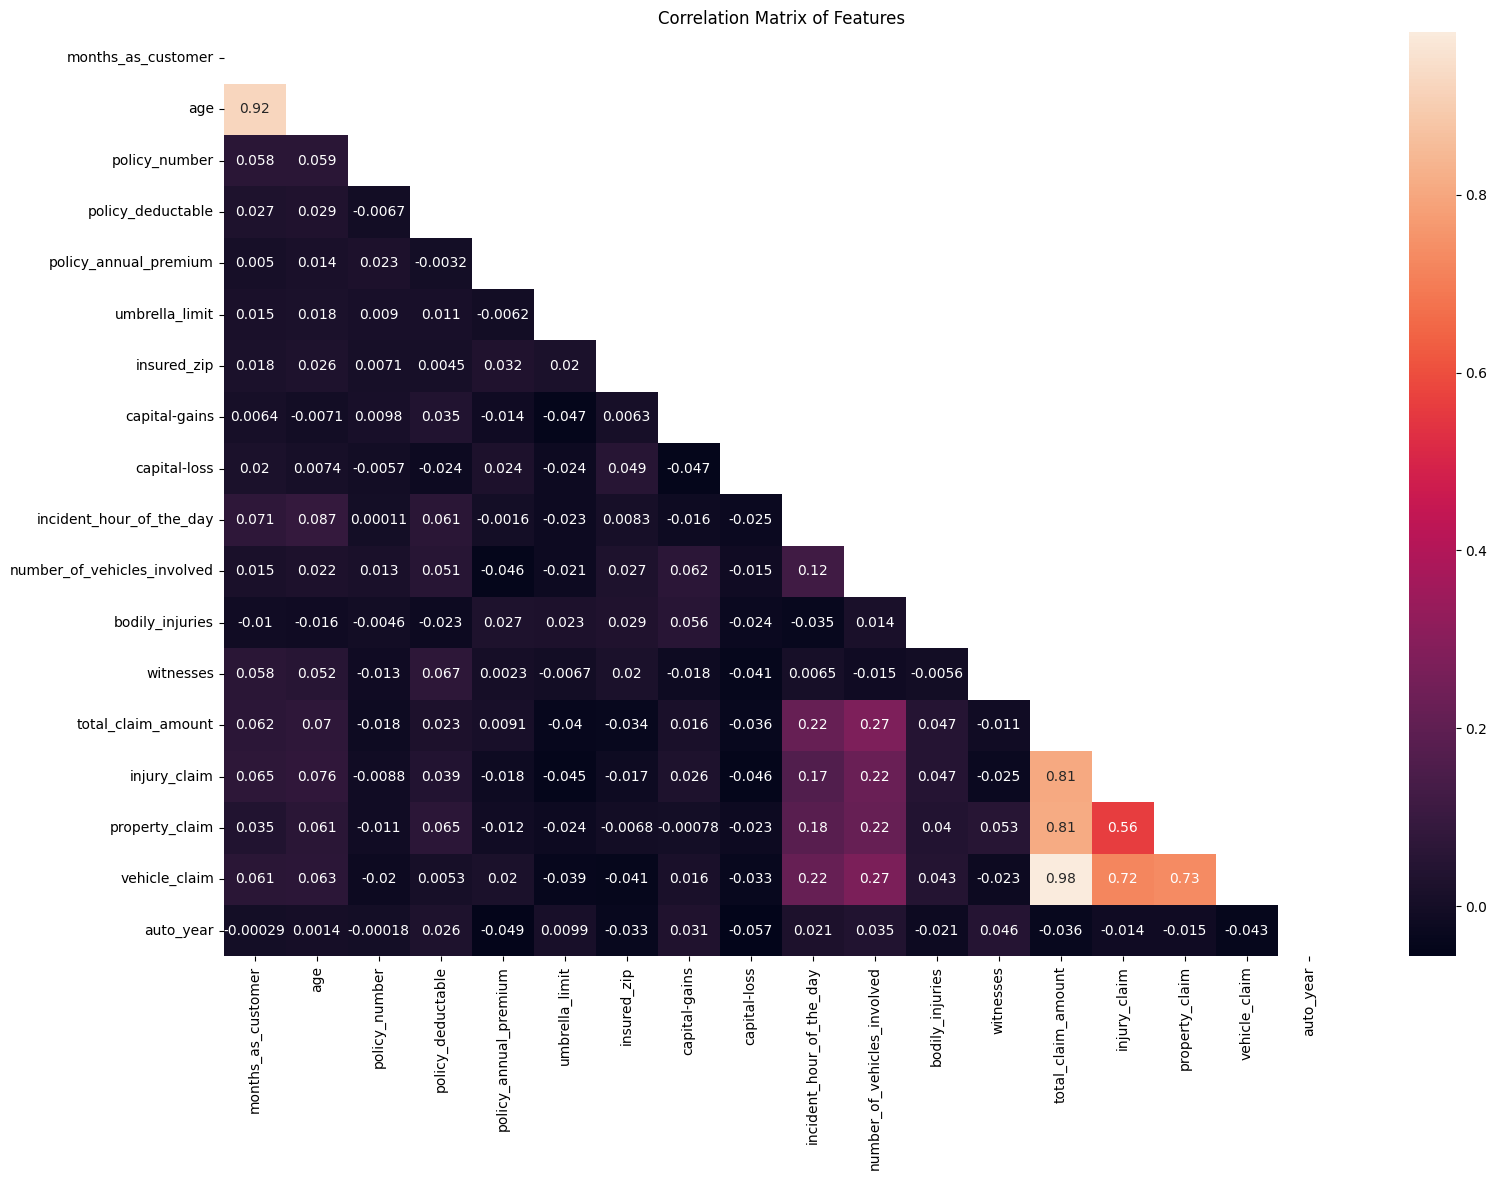

In [8]:
Correlation_Matrix = claims_data.corr(numeric_only=True)
plt.figure(figsize = (18, 12))
mask = np.triu(np.ones_like(Correlation_Matrix, dtype=bool))
sns.heatmap(Correlation_Matrix,mask=mask, annot = True)
plt.title('Correlation Matrix of Features')

Following the correlation matrix, we can remove the 'age' variable and the 'total_claim_amount' variable is the sum of 'injury_claim', 'property_claim' and 'vehicle_claim' hence the high correlation, but the latter will stay because it will be used in one of the processes.
<br>
Another way of removing unnecessary variables is to look for unique values/categories in each variable and the higher that number is the less useful that variable will be for the prediction.

In [9]:
claims_data.nunique()

,0
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


After all these analyses, we decide to remove all the variables found below given that they are not necessary for the prediction for various reasons (zero values, high correlation, etc.) and showcase the summary/info about the remaining ones.

In [10]:
clean_data = claims_data.drop(['_c39', 'age','policy_number','policy_bind_date','policy_state','insured_hobbies','auto_year','auto_make','auto_model','incident_location',
           'incident_state','incident_city','incident_date','insured_zip'],axis=1)
display(clean_data.head())
print(clean_data.info())

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,1,NO,0,1,NO,6500,1300,650,4550,N


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

Now, with the new dataset we can focus on identifying and tranforming categorical variables to numeric ones so as to pass them into different processes.

In [11]:
# Treating the categorical values
categorical_values=clean_data.select_dtypes(include = ['object'])
for col in categorical_values.columns:
   print(f"{col}: \n{categorical_values[col].unique()}\n")
new_categorical_values = pd.get_dummies(categorical_values, drop_first = True)
new_categorical_values = new_categorical_values.astype(int)

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Zero' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']

fraud_reported: 
['Y' 'N']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   float64
 1   policy_deductable                       1000 non-null   float64
 2   umbrella_limit                          1000 non-null   float64
 3   capital-gains                           1000 non-null   float64
 4   capital-loss                            1000 non-null   float64
 5   incident_hour_of_the_day                1000 non-null   float64
 6   number_of_vehicles_involved             1000 non-null   float64
 7   bodily_injuries                         1000 non-null   float64
 8   witnesses                               1000 non-null   float64
 9   total_claim_amount                      1000 non-null   float64
 10  injury_claim                            1000 non-null   float

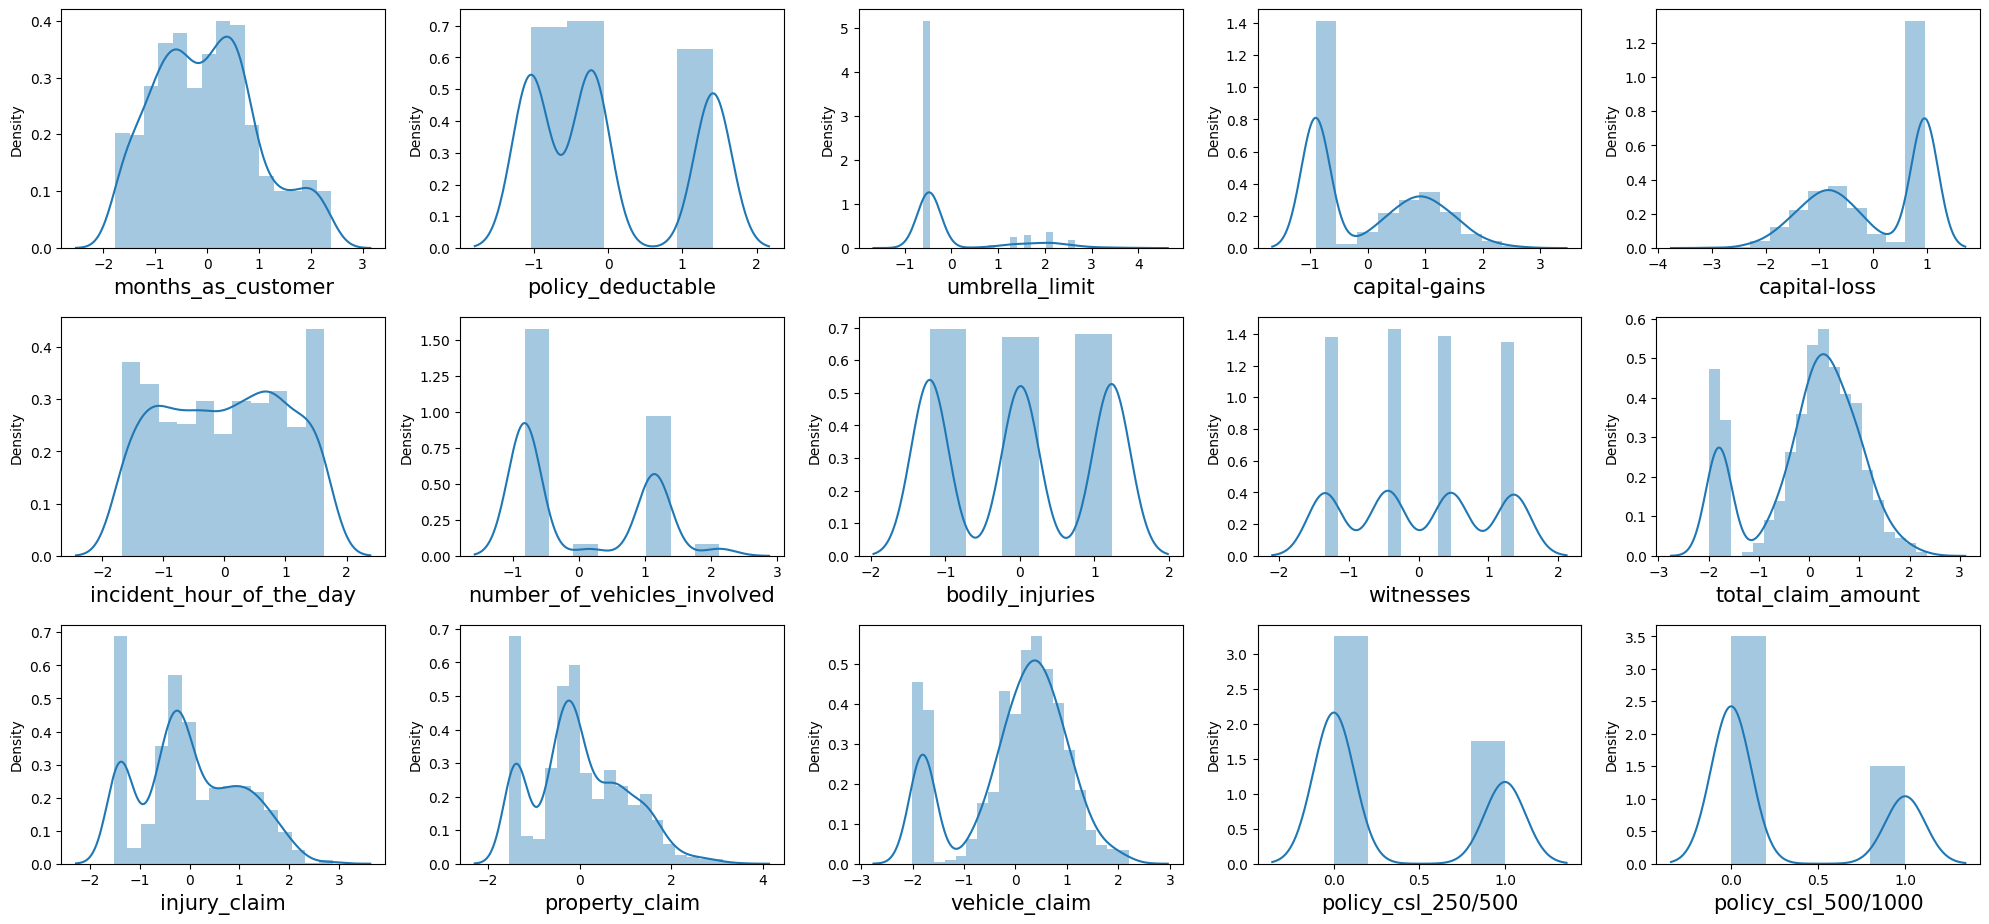

In [73]:
# Getting the numerical values as well
numerical_values = clean_data.select_dtypes(include = ['int64'])

# Scaling the numerical variables by standardization
scaler = StandardScaler()
std_data = scaler.fit_transform(numerical_values)
std_numerical_values = pd.DataFrame(data = std_data, columns = numerical_values.columns, index = numerical_values.index)

# Putting together the new categorical values and the standardized numerical values
new_clean_data=pd.concat([std_numerical_values, new_categorical_values], axis = 1)
new_clean_data.info()

# A plot showing the 15 first variables
plt.figure(figsize = (20, 15))
pltnbr = 1
for col in new_clean_data.columns:
    if pltnbr <= 15:
        ax = plt.subplot(5, 5, pltnbr)
        sns.distplot(new_clean_data[col])
        plt.xlabel(col, fontsize = 15)
    pltnbr += 1
plt.tight_layout()
plt.show()

We can now check the potential outliers using the Inter-quantile method and removing them from our dataset. However, we shall not take into account the 'umbrella_limit' which presents special values and may badly influence the results.

Original dataset shape: (1000, 55)
Cleaned dataset shape: (993, 55)


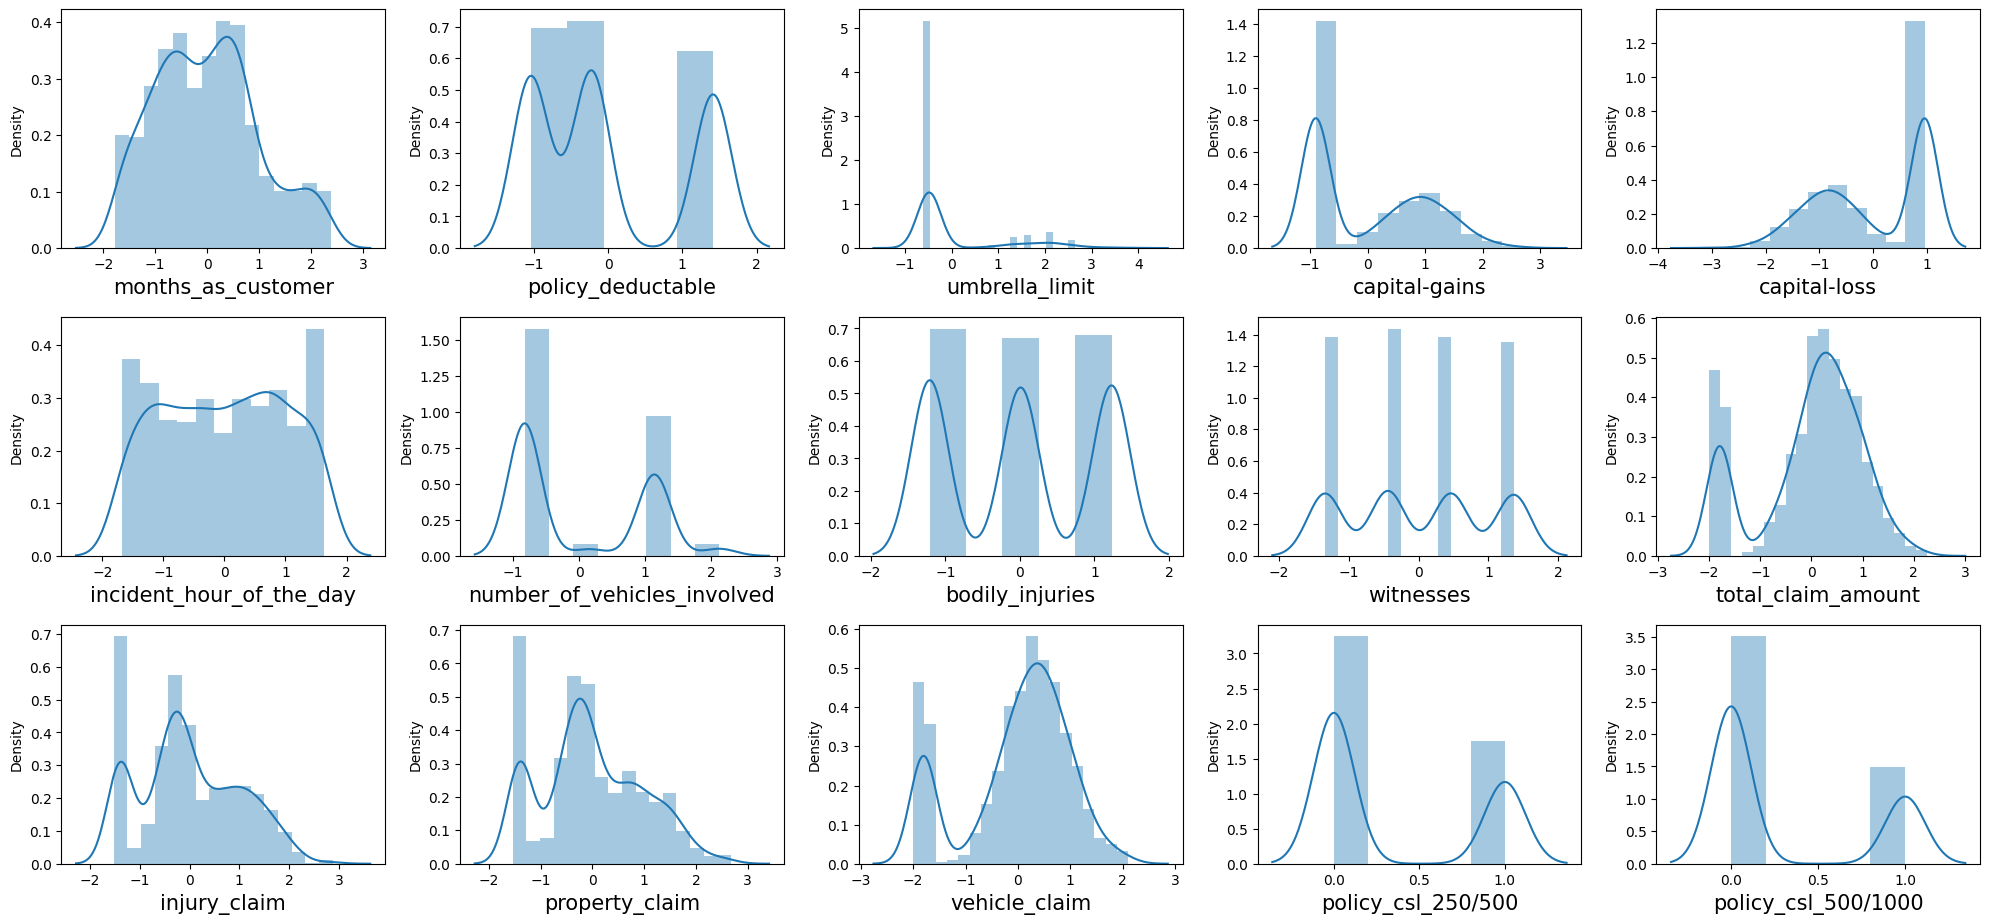

In [88]:
numerical_columns = std_numerical_values[['months_as_customer', 'policy_deductable',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim']]

# Creation of a boolean mask used for filtering and starts with all True
mask = pd.Series([True] * len(new_clean_data))

for col in numerical_columns:
    Q1 = new_clean_data[col].quantile(0.25)
    Q3 = new_clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask &= (new_clean_data[col] >= lower_bound) & (new_clean_data[col] <= upper_bound) # Update of the mask to include only non-outlier rows for the current column

# Filter the DataFrame using the combined mask
Final_claims_data = new_clean_data[mask]

# Check the result
print("Original dataset shape:", new_clean_data.shape)
print("Cleaned dataset shape:", Final_claims_data.shape)
plt.figure(figsize = (20, 15))
pltnbr = 1
for col in Final_claims_data.columns:
    if pltnbr <= 15:
        ax = plt.subplot(5, 5, pltnbr)
        sns.distplot(Final_claims_data[col])
        plt.xlabel(col, fontsize = 15)
    pltnbr += 1
plt.tight_layout()
plt.show()

In [ ]:
numerical_columns = new_clean_data.select_dtypes(include=['float64', 'int64']).columns

Original dataset shape: (1000, 55)
Cleaned dataset shape: (993, 55)


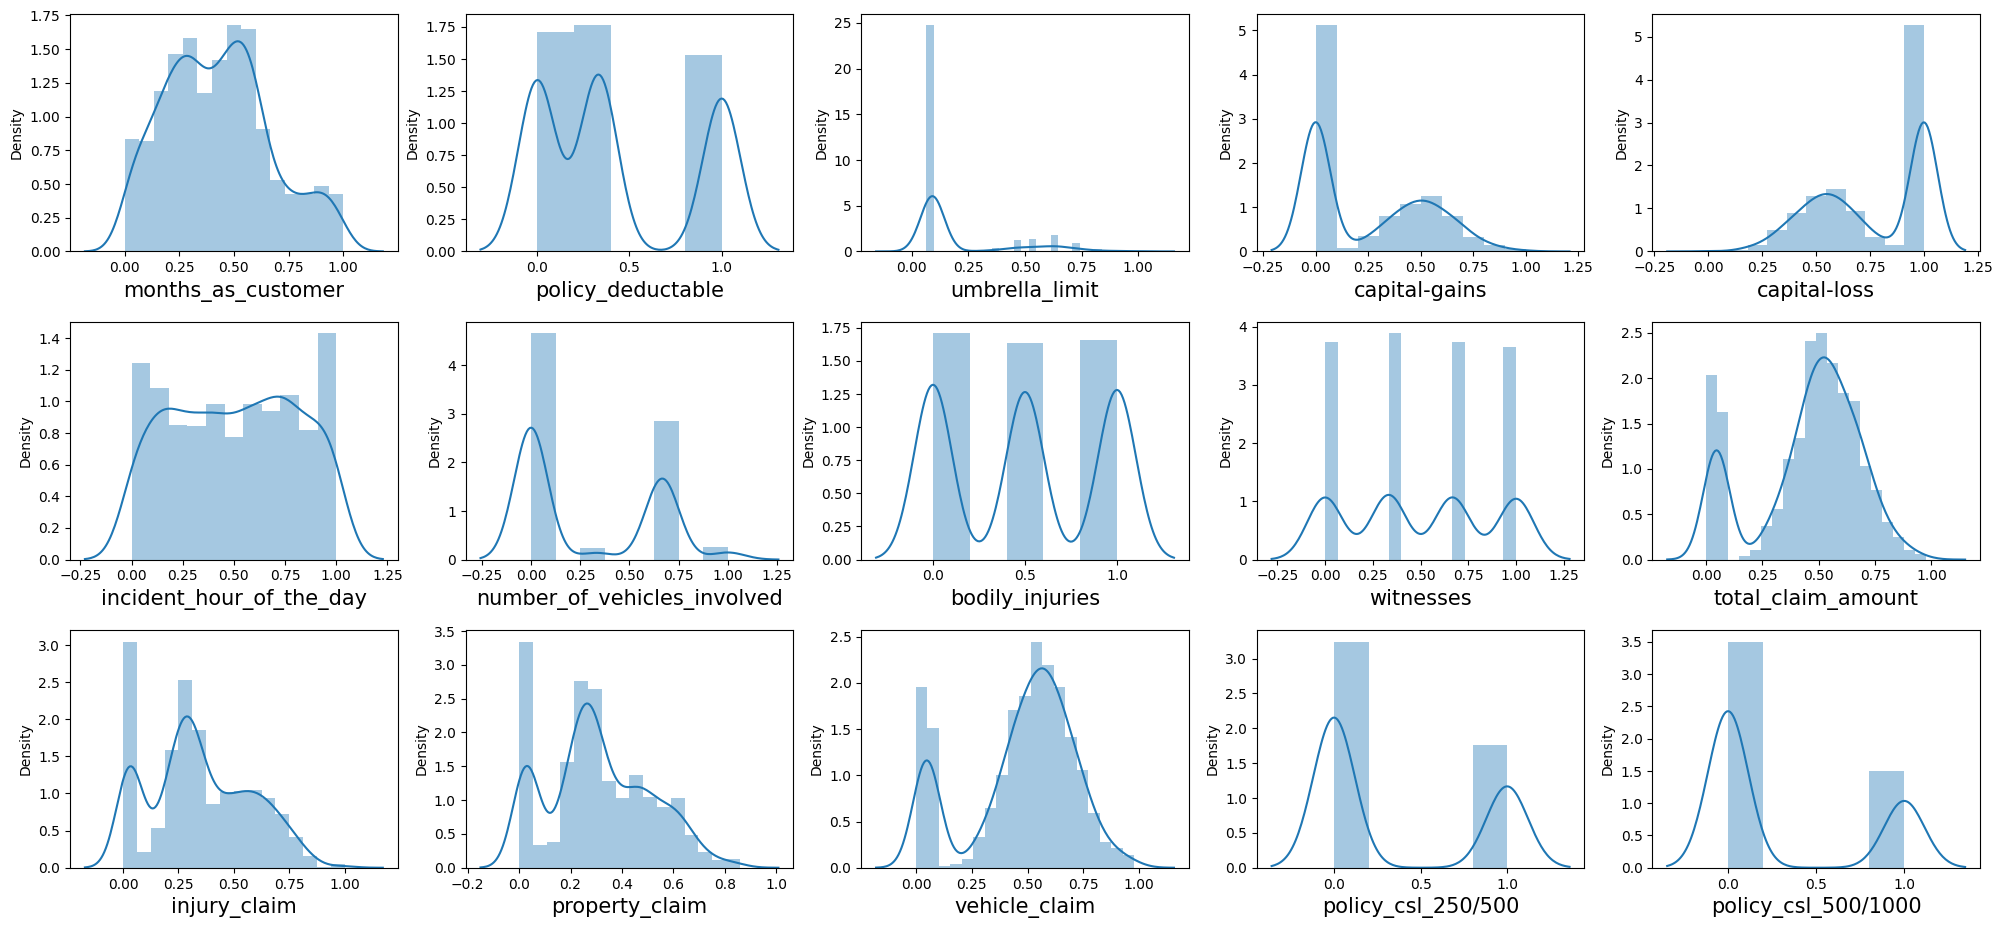

In [63]:
numerical_columns = new_clean_data[['months_as_customer', 'policy_deductable',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim']]

# Create a boolean mask for filtering
mask = pd.Series([True] * len(new_clean_data))  # Start with all True

for col in numerical_columns:
    Q1 = new_clean_data[col].quantile(0.25)
    Q3 = new_clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update the mask to include only non-outlier rows for the current column
    mask &= (new_clean_data[col] >= lower_bound) & (new_clean_data[col] <= upper_bound)

# Filter the DataFrame using the combined mask
cleaned_data = new_clean_data[mask]

# Check the result
print("Original dataset shape:", new_clean_data.shape)
print("Cleaned dataset shape:", cleaned_data.shape)
plt.figure(figsize = (20, 15))
pltnbr = 1
for col in cleaned_data.columns:
    if pltnbr <= 15:
        ax = plt.subplot(5, 5, pltnbr)
        sns.distplot(cleaned_data[col])
        plt.xlabel(col, fontsize = 15)
    pltnbr += 1
plt.tight_layout()
plt.show()

Cleaned dataset shape: (1000, 55)
   months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0            0.684760           0.333333        0.090909       0.530348   
1            0.475992           1.000000        0.545455       0.000000   
2            0.279749           1.000000        0.545455       0.349254   
3            0.534447           1.000000        0.636364       0.486567   
4            0.475992           0.333333        0.636364       0.656716   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0      1.000000                  0.217391                     0.000000   
1      1.000000                  0.347826                     0.000000   
2      1.000000                  0.304348                     0.666667   
3      0.438344                  0.217391                     0.000000   
4      0.585959                  0.869565                     0.000000   

   bodily_injuries  witnesses  total_claim_amount  ...  \
0           

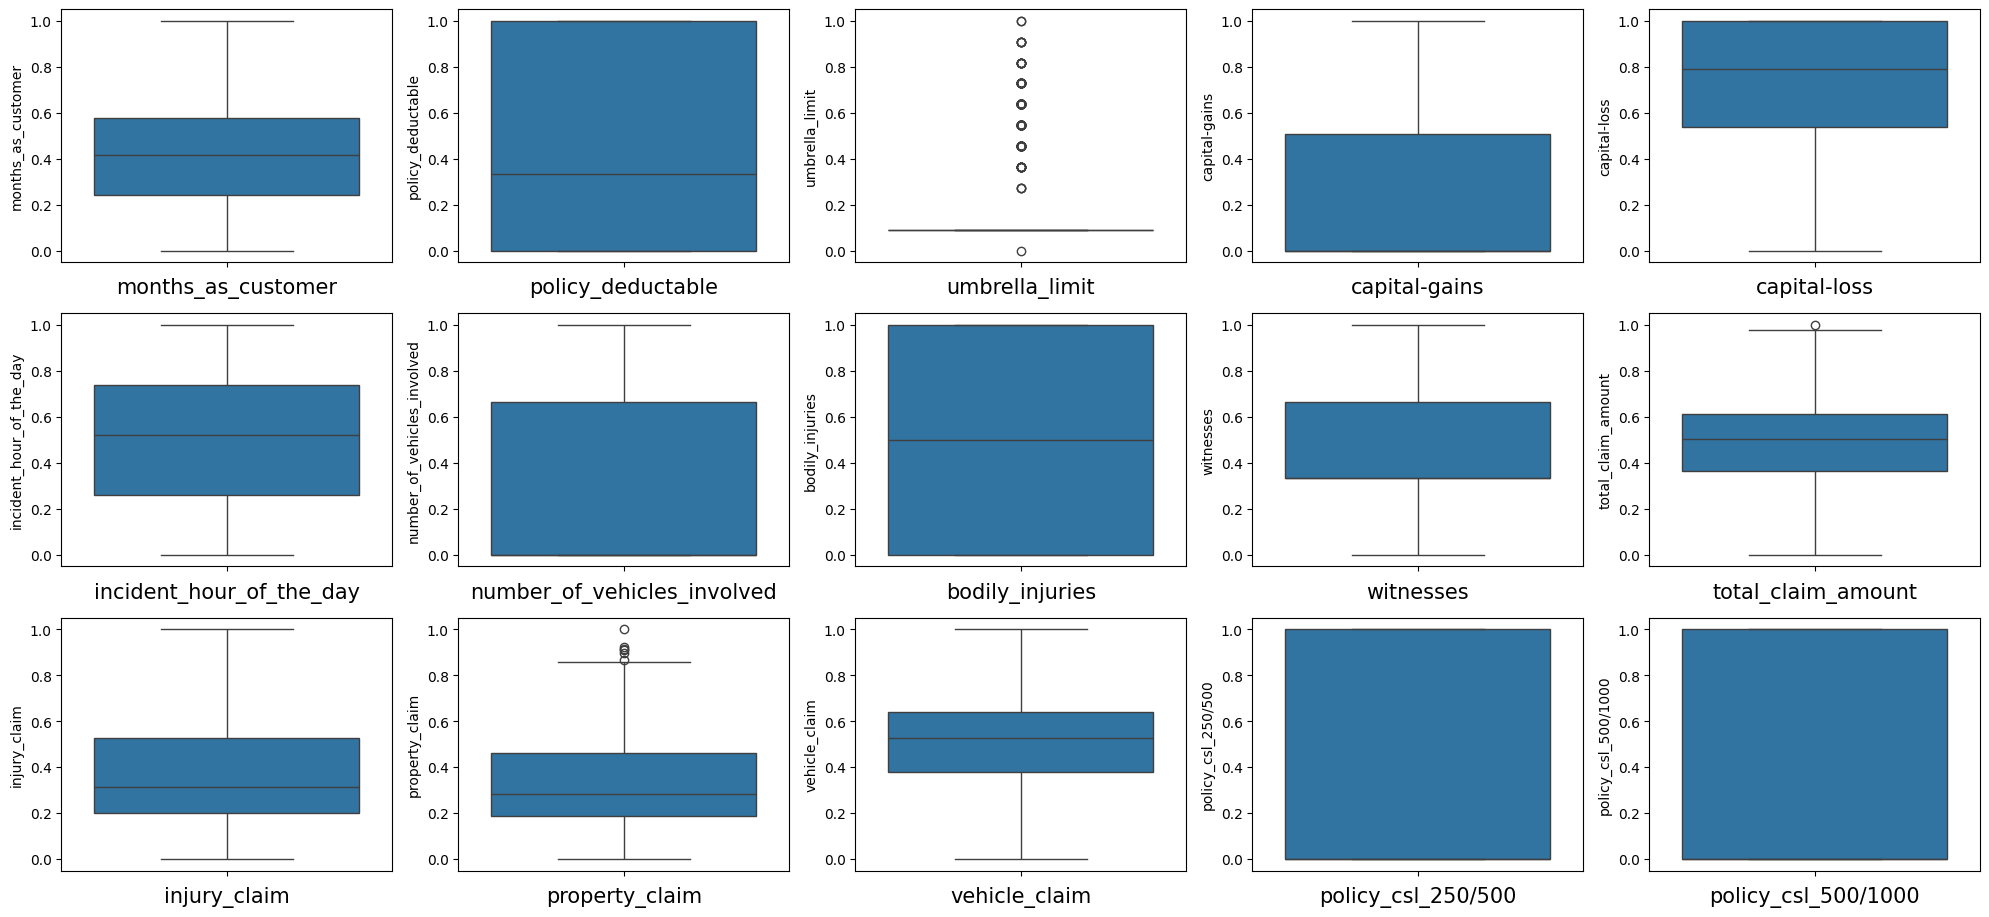

In [54]:
numerical_columns = new_clean_data[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim']]

# Calculate IQR for each numerical column
for col in numerical_columns:
    Q1 = new_clean_data[col].quantile(0.25)
    Q3 = new_clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers for each column
    df = new_clean_data[(new_clean_data[col] >= lower_bound) & (new_clean_data[col] <= upper_bound)]
print("Cleaned dataset shape:", df.shape)
print(df.head())
plt.figure(figsize = (20, 15))
pltnbr = 1
for col in df.columns:
    if pltnbr <= 15:
        ax = plt.subplot(5, 5, pltnbr)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    pltnbr += 1
plt.tight_layout()
plt.show()

Original dataset shape: (1000, 55)
Cleaned dataset shape using IQR method: (0, 55)


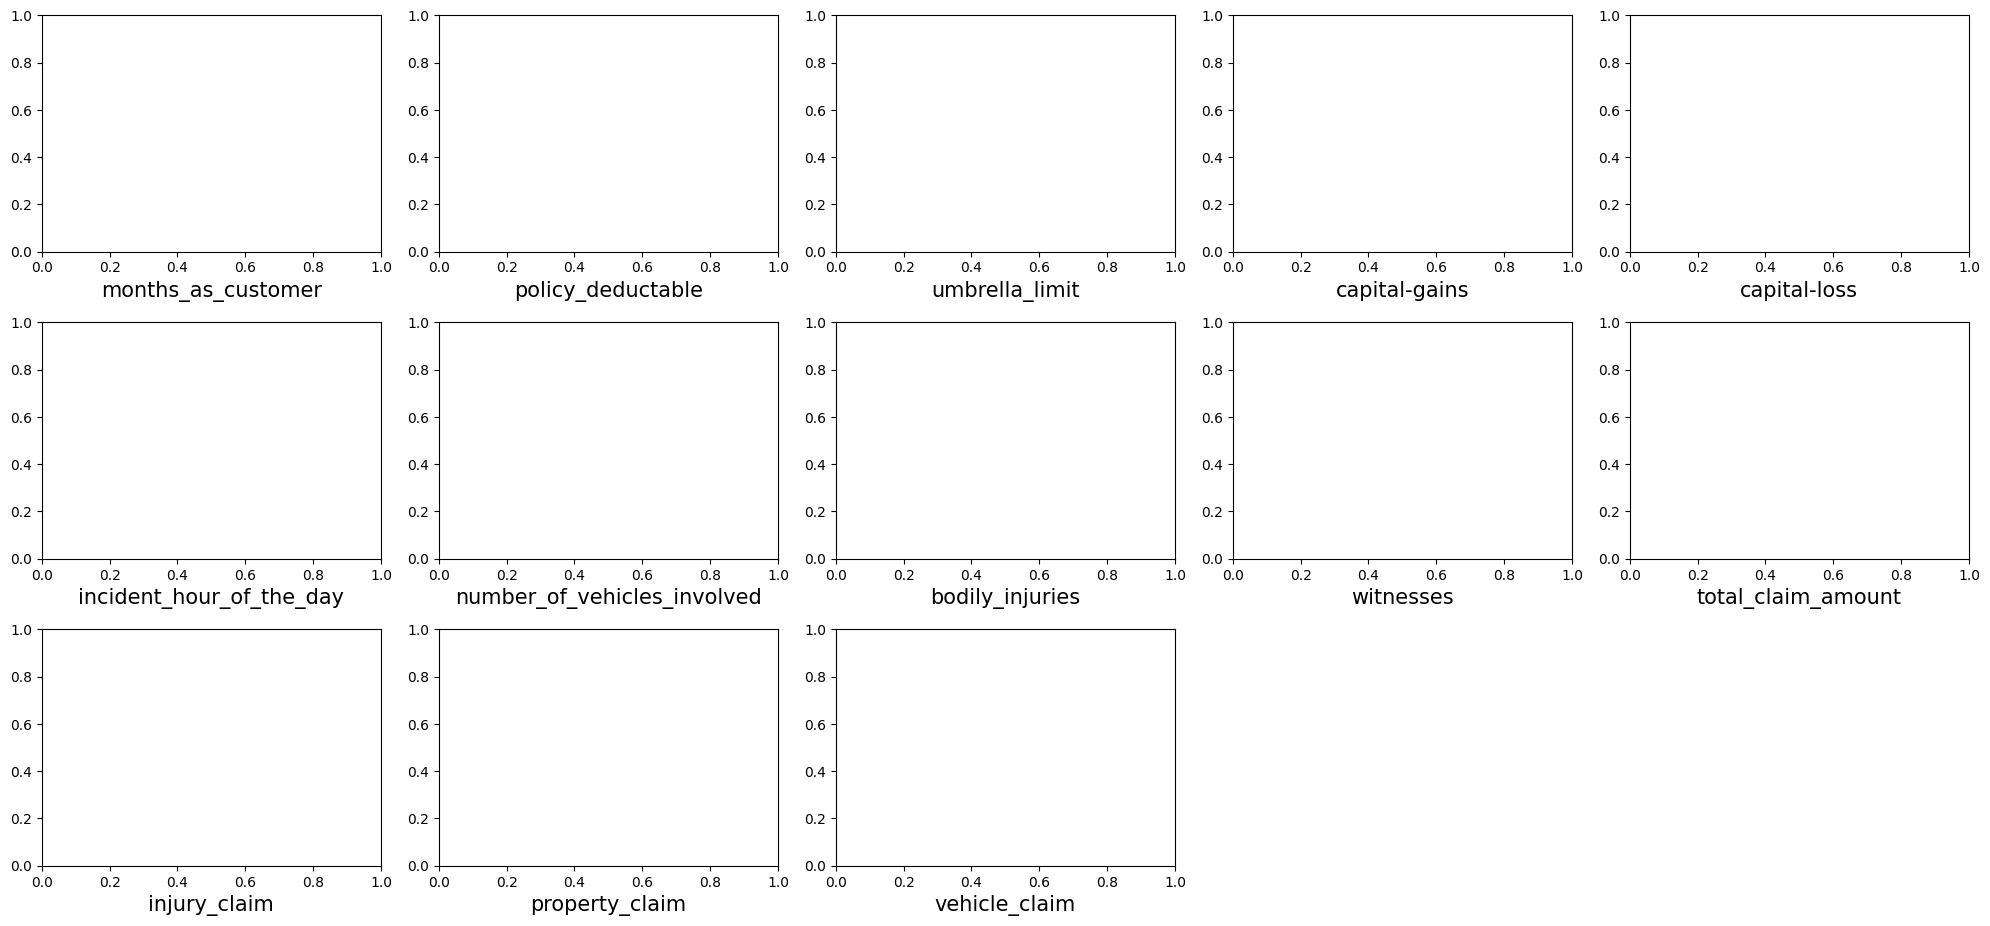

In [49]:

Q1 = new_clean_data.quantile(0.25)
Q3 = new_clean_data.quantile(0.75)
IQR = Q3 - Q1

# Define a condition for outliers
condition = ~((new_clean_data < (Q1 - 1.5 * IQR)) | (new_clean_data > (Q3 + 1.5 * IQR))).any(axis=1)
cleaned_df_iqr = new_clean_data[condition]
print("Original dataset shape:", new_clean_data.shape)
print("Cleaned dataset shape using IQR method:", cleaned_df_iqr.shape)
plt.figure(figsize = (20, 15))
pltnbr = 1
for col in cleaned_df_iqr.columns:
    if pltnbr <= 13:
        ax = plt.subplot(5, 5, pltnbr)
        sns.boxplot(cleaned_df_iqr[col])
        plt.xlabel(col, fontsize = 15)
    pltnbr += 1
plt.tight_layout()
plt.show()

After transforming the categorical values into new ones composed of binary values, we concatenate them with the existing numerical values and get a new set of data containing 1000 rows and 54 columns that will be used in the different processes.

These 15 figures above, in which the first 13 represent the numerical variables and the last 3 represent the new categorical variables, help us see that there is nothing alarming about the dataset so far and we can go on with the study.

# 3. Linear Models and Conditional Expectation Estimation<a name="Linear_Models"></a>

In [15]:
# Split the dataset into features and target variable
X = new_clean_data.drop(['total_claim_amount','injury_claim','property_claim','vehicle_claim'], axis=1)
x = sm.add_constant(X)
y = new_clean_data['total_claim_amount']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

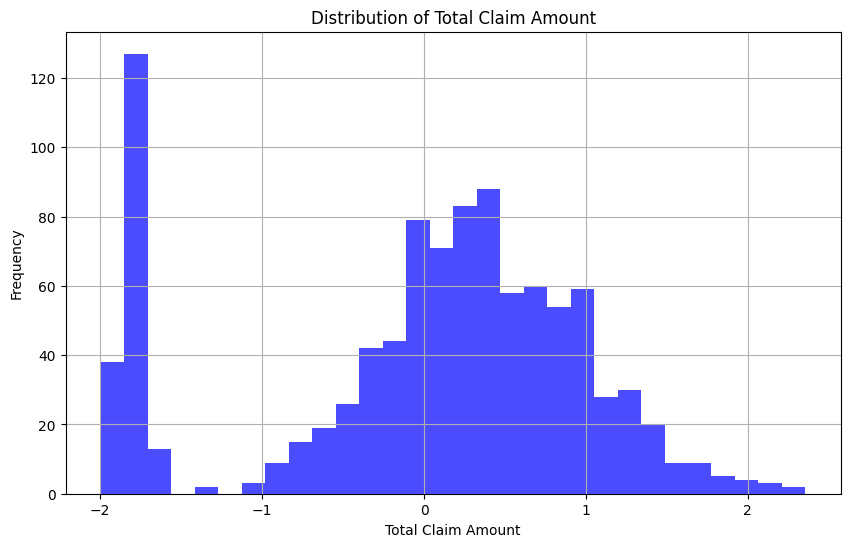

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [16]:
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     46.89
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          4.00e-222
Time:                        09:10:26   Log-Likelihood:                -789.36
No. Observations:                1000   AIC:                             1683.
Df Residuals:                     948   BIC:                             1938.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2793      0.140      1.998      0.046       0.005       0.554
months_as_customer                         0.0203      0.018      1.149      0.251      -0.014       0.055
policy_deductable                          0.0231      0.018      1.296      0.195      -0.012       0.058
umbrella_limit                            -0.0018      0.018     -0.100      0.920      -0.037       0.033
capital-gains                             -0.0160      0.018     -0.893      0.372      -0.051       0.019
capital-loss                              -0.0213      0.018     -1.200      0.230      -0.056       0.014
incident_hour_of_the_day                   0.0072      0.018      0.392      0.695      -0.029       0.043
number_of_vehicles_involved               -0.0141      0.073     -0.193      0.847      -0.157       0.129
bodily_injuries                            0.0370      0.018      2.091      0.037       0.002       0.072
witnesses                                 -0.0086      0.018     -0.482      0.630      -0.043       0.026
policy_csl_250/500                        -0.0299      0.042     -0.705      0.481      -0.113       0.053
policy_csl_500/1000                       -0.0048      0.044     -0.107      0.915      -0.092       0.083
insured_sex_MALE                          -0.0286      0.035     -0.807      0.420      -0.098       0.041
insured_education_level_College           -0.1064      0.070     -1.520      0.129      -0.244       0.031
insured_education_level_High School        0.0714      0.065      1.103      0.270      -0.056       0.198
insured_education_level_JD                -0.0244      0.065     -0.376      0.707      -0.152       0.103
insured_education_level_MD                 0.0406      0.066      0.614      0.540      -0.089       0.171
insured_education_level_Masters            0.0788      0.066      1.188      0.235      -0.051       0.209
insured_education_level_PhD                0.0458      0.069      0.664      0.507      -0.090       0.181
insured_occupation_armed-forces            0.0434      0.096      0.451      0.652      -0.145       0.232
insured_occupation_craft-repair            0.0471      0.095      0.496      0.620      -0.140       0.234
insured_occupation_exec-managerial         0.0878      0.095      0.928      0.354      -0.098       0.274
insured_occupation_farming-fishing        -0.1364      0.104     -1.314      0.189      -0.340       0.067
insured_occupation_handlers-cleaners       0.1184      0.103      1.148      0.251      -0.084       0.321
insured_occupation_machine-op-inspct      -0.0072      0.090     -0.080      0.936      -0.184       0.170
insured_occupation_other-service           0.0579      0.096      0.604      0.546     

In [17]:
model_LR= LinearRegression().fit(x, y)
params = np.append(model_LR.intercept_,model_LR.coef_)
print("Parameters of the linear regression:", params[0].round(3), ",", params[2].round(3), "and", params[3].round(3))

Parameters of the linear regression: 0.279 , 0.02 and 0.023


In [18]:
print("t-statistic: ")
print(sm.OLS(y, x).fit().tvalues)
print("---------------------------------------------------------------------")
print("p-value: ")
print(sm.OLS(y, x).fit().pvalues)

t-statistic: 
const                                      1.997696
months_as_customer                         1.149490
policy_deductable                          1.296300
umbrella_limit                            -0.100266
capital-gains                             -0.893360
capital-loss                              -1.199888
incident_hour_of_the_day                   0.391864
number_of_vehicles_involved               -0.192681
bodily_injuries                            2.091461
witnesses                                 -0.481790
policy_csl_250/500                        -0.704848
policy_csl_500/1000                       -0.107385
insured_sex_MALE                          -0.807169
insured_education_level_College           -1.519937
insured_education_level_High School        1.102916
insured_education_level_JD                -0.376142
insured_education_level_MD                 0.613695
insured_education_level_Masters            1.187779
insured_education_level_PhD                0.66432

In [19]:
model = sm.OLS(y, sm.add_constant(x)).fit()
aic_value = model.aic
bic_value = model.bic
print("AIC:", round(aic_value, 2))
print("BIC:", round(bic_value, 2))

AIC: 1682.73
BIC: 1937.93


In [20]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)

In [21]:
R2_train_set = model.rsquared
R2_test_set = r2_score(y_test, y_pred)

# R2 on the train dataset
print("R2 on the train dataset:", round(R2_train_set,3))
# R2 on the test dataset
print("R2 on the test dataset:", round(R2_test_set, 3))

R2 on the train dataset: 0.705
R2 on the test dataset: 0.739


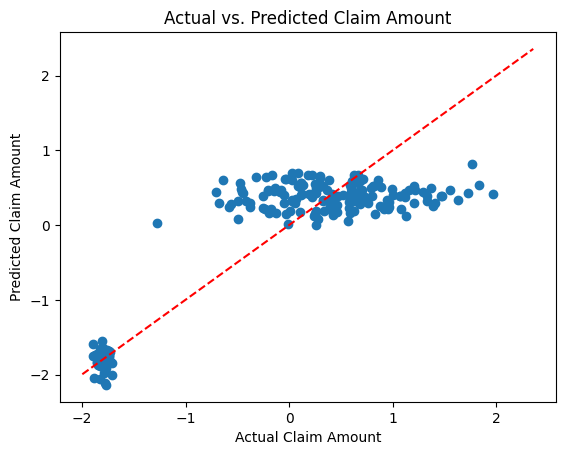

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Claim Amount')
plt.ylabel('Predicted Claim Amount')
plt.title('Actual vs. Predicted Claim Amount')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line of equality
plt.show()

In [ ]:
# Split the dataset into features and target variable
X_2 = new_clean_data[['bodily_injuries','authorities_contacted_Other','property_damage_YES','incident_type_Parked Car','incident_type_Vehicle Theft']]
x_2 = sm.add_constant(X_2)
y_2 = new_clean_data['total_claim_amount']
# Split the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2, random_state=23)

In [ ]:
model_2 = sm.OLS(y_2, x_2)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     467.7
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          3.86e-258
Time:                        16:39:06   Log-Likelihood:                -814.09
No. Observations:                1000   AIC:                             1640.
Df Residuals:                     994   BIC:                             1670.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3376      0.025     13.589      0.000       0.289       0.386
bodily_injuries                 0.0401      0.017      2.314      0.021       0.006       0.074
authorities_contacted_Other     0.0916      0.045      2.050      0.041       0.004       0.179
property_damage_YES             0.0936      0.038      2.479      0.013       0.020       0.168
incident_type_Parked Car       -2.1555      0.064    -33.824      0.000      -2.281      -2.030
incident_type_Vehicle Theft    -2.1588      0.061    -35.611      0.000      -2.278      -2.040
==============================================================================
Omnibus:                       19.011   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.656
Skew:                           0.239   Prob(JB):                     7.30e-06
Kurtosis:                       3.582   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_LR_2= LinearRegression().fit(x_2, y_2)
params_2 = np.append(model_LR_2.intercept_,model_LR_2.coef_)
print("Parameters of the linear regression Part 2:", params_2[0].round(3), ",", params_2[2].round(3), "and", params_2[3].round(3))

Parameters of the linear regression Part 2: 0.338 , 0.04 and 0.092


In [ ]:
model_5 = sm.OLS(y_2, sm.add_constant(x_2)).fit()
aic_value_2 = model_5.aic
bic_value_2 = model_5.bic
print("AIC:", round(aic_value_2, 3))
print("BIC:", round(bic_value_2, 3))

AIC: 1640.184
BIC: 1669.63


In [ ]:
#X_train = sm.add_constant(X_train)
#X_test = sm.add_constant(X_test)

model_p = sm.OLS(y_train_2, X_train_2).fit()
y_pred_2 = model_p.predict(X_test_2)

In [ ]:
R2_train_set_2 = model_p.rsquared
R2_test_set_2 = r2_score(y_test_2, y_pred_2)

# R2 on the train dataset
print("R2 on the train dataset:", round(R2_train_set_2,3))
# R2 on the test dataset
print("R2 on the test dataset:", round(R2_test_set_2, 3))

R2 on the train dataset: 0.686
R2 on the test dataset: 0.757


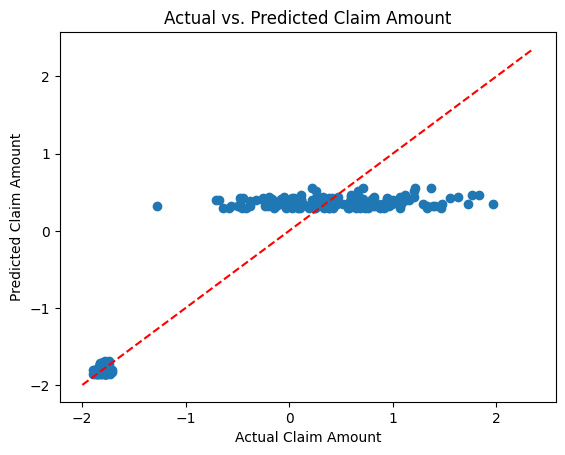

In [ ]:
plt.scatter(y_test_2, y_pred_2)
plt.xlabel('Actual Claim Amount')
plt.ylabel('Predicted Claim Amount')
plt.title('Actual vs. Predicted Claim Amount')
plt.plot([y.min(0), y.max()], [y.min(0), y.max()], color='red', linestyle='--')  # Line of equality
plt.show()

# 4. Model testing and comparison<a name="Testing"></a>

## 4.1. Generalized Linear Models<a name="GLM"></a>

In [ ]:
# Split the dataset into features and target variable
X = new_clean_data.drop(['total_claim_amount','fraud_reported_Y'], axis=1)
x = sm.add_constant(X)
y = new_clean_data['fraud_reported_Y']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

# Fit the GLM model
glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
glm_results = glm_model.fit()

# Predict probabilities
y_pred_prob = glm_results.predict(X_test)

# Convert probabilities to binary predictions (threshold can be adjusted)
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Confusion Matrix:
[[131  15]
 [ 38  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.52      0.30      0.38        54

    accuracy                           0.73       200
   macro avg       0.65      0.60      0.60       200
weighted avg       0.71      0.73      0.71       200

Accuracy: 0.735


Model Performance: The model performs reasonably well on predicting non-fraudulent claims (high precision and recall for class 0) but struggles significantly with fraudulent claims (low precision and recall for class 1).

Imbalance Issues: The model has a tendency to classify many claims as not fraudulent, leading to a high recall for that class but a low recall for fraudulent claims. This indicates that the model may be biased towards the majority class (not fraudulent).

Improvement Areas:

Consider methods to improve the detection of fraudulent claims, such as adjusting the classification threshold, using different algorithms, or employing techniques to handle class imbalance (like oversampling the minority class, undersampling the majority class, or using synthetic data generation techniques like SMOTE).
Evaluation Using Multiple Metrics: It's important to evaluate the model using multiple metrics (precision, recall, F1-score) rather than relying solely on accuracy, especially in cases of class imbalance.

## 4.2. Ridge Regression<a name="Ridge"></a>

In [ ]:
# Apply Ridge Regression with default parameters
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)


In [ ]:
# Extract the coefficients
coefficients = ridge.coef_

# Create a DataFrame to display the coefficients alongside the feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients sorted by their absolute value
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

print(f'Alpha = {ridge.alpha}')
print(coef_df)

In [ ]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression MAE: {mae_ridge}')
print(f'Ridge Regression R^2: {r2_ridge}')

In [ ]:
# Hyperparameter tuning using GridSearchCV
ridge_params = {'alpha':np.logspace(-6, 1, 50)}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=10, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Get best estimator
best_ridge = ridge_grid.best_estimator_

In [ ]:
# Extract results from GridSearchCV
results = pd.DataFrame(ridge_grid.cv_results_)

# Plot mean test scores for each alpha
plt.figure(figsize=(10, 6))
plt.plot(results['param_alpha'], -results['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Grid Search Results for Ridge Regression')
plt.show()

In [ ]:
# Extract the coefficients
best_ridge_coefficients = best_ridge.coef_

# Create a DataFrame to display the coefficients alongside the feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': best_ridge_coefficients})

# Display the coefficients sorted by their absolute value
print(f'Best Ridge Regression alpha= {best_ridge.alpha}')
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
print(coef_df)

In [ ]:
y_pred_best_ridge = best_ridge.predict(X_test_scaled)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
mae_best_ridge= mean_absolute_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

print(f'Best Ridge Regression MSE: {mse_best_ridge}')
print(f'Best Ridge Regression MAE: {mae_best_ridge}')
print(f'Best Ridge Regression R^2: {r2_best_ridge}')

In [ ]:
# Define the range of alpha values using an eps-like parameter
alpha_max = 1e10
alpha_min = 1e-5
eps = 5e-3
alphas = np.logspace(np.log10(alpha_min), np.log10(alpha_max * eps), 100)

def plot_coefficient_path_ridge(X, y, feature_names, alphas):
    coefs = []

    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X, y)
        coefs.append(ridge.coef_)

    coefs = np.array(coefs)

    fig = go.Figure()

    # Add a trace for each feature
    for i, feature_name in enumerate(feature_names):
        fig.add_trace(go.Scatter(
            x=alphas,
            y=coefs[:, i],
            mode='lines',
            name=feature_name
        ))

    fig.update_layout(
        title='Ridge Paths',
        xaxis=dict(title='alpha', type='log'),
        yaxis=dict(title='Coefficients'),
        template='plotly_white'
    )

    fig.show()

# Plot coefficient paths for Ridge with feature names and custom alphas
plot_coefficient_path_ridge(X_train_scaled, y_train, feature_names, alphas)

## 4.3. Lasso Regression<a name="Lasso"></a>

In [ ]:
# Apply Lasso Regression with default parameters
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
# Extract the coefficients
coefficients = lasso.coef_

# Create a DataFrame to display the coefficients alongside the feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients sorted by their absolute value
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
print(f'Alpha = {lasso.alpha}')
print(coef_df)


In [ ]:
# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression MAE: {mae_lasso}')
print(f'Lasso Regression R^2: {r2_lasso}')

In [ ]:
# Hyperparameter tuning using GridSearchCV
lasso_params = {'alpha':np.logspace(-6, 1, 50)}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_

In [ ]:
# Extract results from GridSearchCV
results = pd.DataFrame(lasso_grid.cv_results_)

# Plot mean test scores for each alpha
plt.figure(figsize=(10, 6))
plt.plot(results['param_alpha'], -results['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Grid Search Results for Ridge Regression')
plt.show()

In [ ]:
# Extract the coefficients
best_lasso_coefficients = best_lasso.coef_

# Create a DataFrame to display the coefficients alongside the feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': best_lasso_coefficients})

# Display the coefficients sorted by their absolute value
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
print(f'Beste Alpha = {best_lasso.alpha}')
print(coef_df)

In [ ]:
y_pred_best_lasso = best_lasso.predict(X_test_scaled)
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
mae_best_lasso = mean_absolute_error(y_test, y_pred_best_lasso)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)

print(f'Best Lasso Regression MSE: {mse_best_lasso}')
print(f'Best Lasso Regression MAE: {mae_best_lasso}')
print(f'Best Lasso Regression R^2: {r2_best_lasso}')

In [ ]:
def plot_coefficient_path_lasso(X, y, feature_names):
    alphas, coefs, _ = lasso_path(X, y, eps=5e-3)

    fig = go.Figure()

    # Add a trace for each feature
    for i, feature_name in enumerate(feature_names):
        fig.add_trace(go.Scatter(
            x=alphas,
            y=coefs[i],
            mode='lines',
            name=feature_name
        ))

    fig.update_layout(
        title='Lasso Paths',
        xaxis=dict(title='alpha', type='log'),
        yaxis=dict(title='Coefficients'),
        template='plotly_white'
    )

    fig.show()

# Plot coefficient paths for Lasso with feature names
plot_coefficient_path_lasso(X_train_scaled, y_train, feature_names)

## 4.4. ElasticNet Regression<a name="ElasticNet"></a>

In [ ]:
# Apply ElasticNet Regression with default parameters
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
y_pred_elastic_net = elastic_net.predict(X_test_scaled)

In [ ]:
# Extract the coefficients
coefficients = elastic_net.coef_

# Create a DataFrame to display the coefficients alongside the feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients sorted by their absolute value
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
print(f'Alpha={elastic_net.alpha}')
print(f'L1 ratio={elastic_net.l1_ratio}')
print(coef_df)

In [ ]:
# Evaluate the model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print(f'ElasticNet Regression MSE: {mse_elastic_net}')
print(f'ElasticNet Regression MAE: {mae_elastic_net}')
print(f'ElasticNet Regression R^2: {r2_elastic_net}')

In [ ]:
# Hyperparameter tuning using GridSearchCV
elastic_net_params = {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}

elastic_net_grid = GridSearchCV(ElasticNet(), elastic_net_params, cv=5, scoring='neg_mean_squared_error')
elastic_net_grid.fit(X_train_scaled, y_train)
best_elastic_net = elastic_net_grid.best_estimator_

In [ ]:
# Extract results from grid search
results = elastic_net_grid.cv_results_
mean_test_score = results['mean_test_score'].reshape(4, 3)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_test_score, annot=True, fmt=".3f", xticklabels= [0.01, 0.1, 1.0, 10.0], yticklabels=[0.1, 0.5, 0.9])
plt.xlabel('alpha')
plt.ylabel('l1_ratio')
plt.title('Mean Squared Error for different alpha and l1_ratio')
plt.show()

In [ ]:
# Extract the coefficients
best_elastic_net_coefficients = best_elastic_net.coef_

# Create a DataFrame to display the coefficients alongside the feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': best_elastic_net_coefficients})

# Display the coefficients sorted by their absolute value
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
print(f'Alpha={best_elastic_net.alpha}')
print(f'L1 ratio={best_elastic_net.l1_ratio}')
print(coef_df)

In [ ]:
y_pred_best_elastic_net = best_elastic_net.predict(X_test_scaled)
mse_best_elastic_net = mean_squared_error(y_test, y_pred_best_elastic_net)
mae_best_elastic_net = mean_absolute_error(y_test, y_pred_best_elastic_net)
r2_best_elastic_net= r2_score(y_test, y_pred_best_elastic_net)

print(f'Best ElasticNet Regression MSE: {mse_best_elastic_net}')
print(f'Best ElasticNet Regression MAE: {mae_best_elastic_net}')
print(f'Best ElasticNet Regression R^2: {r2_best_elastic_net}')

In [ ]:
def plot_coefficient_path_elasticnet(X, y, feature_names, l1_ratios):
    fig = go.Figure()

    # Iterate over each l1_ratio
    for l1_ratio in l1_ratios:
        alphas, coefs, _ = enet_path(X, y, l1_ratio=l1_ratio, eps=5e-3)

        # Add a trace for each feature for the current l1_ratio
        for i, feature_name in enumerate(feature_names):
            fig.add_trace(go.Scatter(
                x=alphas,
                y=coefs[i],
                mode='lines',
                name=f'{feature_name} (l1_ratio={l1_ratio})'
            ))

    fig.update_layout(
        title='ElasticNet Paths for Different l1_ratios',
        xaxis=dict(title='alpha', type='log'),
        yaxis=dict(title='Coefficients'),
        template='plotly_white'
    )

    fig.show()

# Plot coefficient paths for ElasticNet with feature names and different l1_ratios
plot_coefficient_path_elasticnet(X_train_scaled, y_train, feature_names, l1_ratios=[0.1, 0.5, 0.9])
# plot_coefficient_path_elasticnet(X_train_scaled, y_train, feature_names, l1_ratios=[0.1])

## 4.5. Support Vector Machines<a name="SVM"></a>

In [ ]:
# Apply Support Vector Regression (SVR) with default parameters
svr = SVR(kernel='linear') # Using linear instead of default due to link with previous techniques
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

In [ ]:
# Extract the coefficients
coefficients = svr.coef_[0]

# Create a DataFrame to display the coefficients alongside the feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients sorted by their absolute value
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
print(f'C value = {svr.C}')
print(coef_df)

In [ ]:
# Calculate permutation feature importance
perm_importance = permutation_importance(svr, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})

# Display the importances sorted by their value
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

In [ ]:
# Use RFE to select the most important features
selector = RFE(svr, n_features_to_select=1, step=1)
selector = selector.fit(X_train_scaled, y_train)

# Extract the feature names
feature_names = X.columns

# Create a DataFrame to display the ranking of features
ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': selector.ranking_})

# Display the ranking sorted by their importance
ranking_df = ranking_df.sort_values(by='Ranking')
print(ranking_df)

In [ ]:
# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Support Vector Regression MSE: {mse_svr}')
print(f'Support Vector Regression MAE: {mae_svr}')
print(f'Support Vector Regression R^2: {r2_svr}')

In [ ]:
# Hyperparameter tuning using GridSearchCV
# svr_params = {'C': [0.1, 1.0, 10.0, 100.0],'kernel' : ['linear','rbf']}
# svr_grid = GridSearchCV(SVR(), svr_params, cv=5, scoring='neg_mean_squared_error')

svr_params = {'C': [0.1, 1.0, 10.0, 100.0]}
svr_grid = GridSearchCV(SVR(kernel='linear'), svr_params, cv=5, scoring='neg_mean_squared_error')

svr_grid.fit(X_train_scaled, y_train)
best_svr = svr_grid.best_estimator_

In [ ]:
# Extract the coefficients
coefficients = best_svr.coef_[0]

# Create a DataFrame to display the coefficients alongside the feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients sorted by their absolute value
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
print(f'C value = {best_svr.C}')
print(coef_df)

In [ ]:
y_pred_best_svr = best_svr.predict(X_test_scaled)
mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
mae_best_svr = mean_absolute_error(y_test, y_pred_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)

print(f'Best Support Vector Regression C: {best_svr.C}')
print(f'Best Support Vector Regression Kernel: {best_svr.kernel}')
print(f'Best Support Vector Regression MSE: {mse_best_svr}')
print(f'Best Support Vector Regression MAE: {mae_best_svr}')
print(f'Best Support Vector Regression R^2: {r2_best_svr}')

## 4.6. Model Comparison and Visaulizations<a name="Model_Comparison"></a>

In [ ]:
# Create a DataFrame to compare the models
model_comparison = pd.DataFrame({
    'Model': ['Ridge', 'Best Ridge', 'Lasso', 'Best Lasso', 'ElasticNet', 'Best ElasticNet', 'SVR', 'Best SVR'],
    'MSE': [mse_ridge, mse_best_ridge, mse_lasso, mse_best_lasso, mse_elastic_net, mse_best_elastic_net, mse_svr, mse_best_svr],
    'MAE': [mae_ridge, mean_absolute_error(y_test, y_pred_best_ridge), mae_lasso, mean_absolute_error(y_test, y_pred_best_lasso), mae_elastic_net, mean_absolute_error(y_test, y_pred_best_elastic_net), mae_svr, mean_absolute_error(y_test, y_pred_best_svr)],
    'R^2': [r2_ridge, r2_score(y_test, y_pred_best_ridge), r2_lasso, r2_score(y_test, y_pred_best_lasso), r2_elastic_net, r2_score(y_test, y_pred_best_elastic_net), r2_svr, r2_score(y_test, y_pred_best_svr)]
})

In [ ]:
# Display the comparison DataFrame
model_comparison

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


# Ridge Plot
sns.barplot(x='Model', y='MSE', data=model_comparison, ax=axes[0])
axes[0].set_title('Model Comparison - Mean Squared Error')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_xlabel('Model')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='MAE', data=model_comparison, ax=axes[1])
axes[1].set_title('Model Comparison - Mean Absolute Error')
axes[1].set_ylabel('Mean Abosule Error')
axes[1].set_xlabel('Model')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='R^2', data=model_comparison, ax=axes[2])
axes[2].set_title('Model Comparison - R^2 Score')
axes[2].set_ylabel('R^2 Score')
axes[2].set_xlabel('Model')
axes[2].tick_params(axis='x', rotation=45)


# Adjust layout
plt.suptitle('Model Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()


# 5. Clustering Methods<a name="Clustering"></a>

K-means++: An improved version of the standard k-means algorithm, it initializes the cluster centroids in a way that spreads them out, which can lead to better clustering results and faster convergence. <br>
For your dataset of 1000 lines and 24 columns, K-means++ would likely be the best choice as it balances efficiency and clustering quality. However, if you suspect outliers might impact your results, consider K-medoids. Always remember to validate the results using appropriate metrics like silhouette score or elbow method to determine the optimal number of clusters.

In [ ]:
# Choice of number of clusters
n_clus = 3
# Get a copy of the data to do clustering on
gcr_num_tmp = gcr_num.copy()
# Use of KMeans function
km = KMeans(init="random", n_clusters=n_clus, n_init=20, max_iter = 300)
# Fit the model to the data
km.fit(gcr_num_tmp)
# Extract centroids and labels
centroids = km.cluster_centers_
labels = km.labels_
# Add cluster labels to the data
gcr_num_tmp['Cluster'] = labels

In [ ]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot the data points and their cluster labels
plt.scatter(gcr_num_tmp.iloc[:, -2] , gcr_num_tmp.iloc[:, -3] , c=labels, s=50)

# Plot the centroids
plt.scatter(centroids[:, -2], centroids[:, -3], c='red', s=200, alpha=0.5, marker='X')

plt.title('KMeans Clusters and Centroids')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.show()

In [ ]:
# 2. Perform K-means for a range of cluster k and save the attribute ineria
inertia = []
k_range = range(2, 20)  # Testing k values from 1 to 10

for k in k_range:
    km = KMeans(init="random", n_clusters=k, n_init=20, max_iter = 300)
    km.fit(gcr_num)
    inertia.append(km.inertia_)

# 3. Plot the Inertia vs. Number of Clusters (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
# Set the x-axis to show only integer values
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
# Range of k values to test
k_range = range(2, 20)
silhouette_scores = []

# Loop over different values of k
for k in k_range:
    # Apply KMeans clustering
    kmeans = KMeans(init="random", n_clusters=k, n_init=20, max_iter = 300)
    kmeans.fit(gcr_num)

    # Calculate the silhouette score for the current clustering
    avg_score = silhouette_score(gcr_num, kmeans.labels_)
    silhouette_scores.append(avg_score)

# Plot the silhouette scores for different k values
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Average Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
# Set the x-axis to show only integer values
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
# Loop over different values of k
for k in k_range:
    # Apply KMeans clustering
    kmeans = KMeans(init="random", n_clusters=k, n_init=20, max_iter=300)
    kmeans.fit(gcr_num)

    # Calculate the silhouette score for the current clustering
    score = silhouette_score(gcr_num, kmeans.labels_)
    silhouette_scores.append(score)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [0.5, 1]
    ax1.set_xlim([0.5, 1])
    # The (k+1)*10 is for inserting blank space between silhouette plots of individual clusters,
    # to demarcate them clearly.
    ax1.set_ylim([0, len(gcr_num) + (k + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(gcr_num, kmeans.labels_)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i,
        # and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(kmeans.labels_.astype(float) / k)
    ax2.scatter(gcr_num.iloc[:, -2], gcr_num.iloc[:, -3], marker='.', s=50, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

Since a higher average silhouette score indicates better-defined cluster, the graphs above suggest that k=2 has the best fit. However, the silhouette plot shows that with k=2, there exists a cluster with below-average silhouette coefficient. Therefore, one should look at the next best k value, which in this case is k=3.

# 6. Conclusion<a name="Conclusion"></a>